# Explore Weather

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

## 📚 Data Dictionary

- **year:** Year on which metrics were calculated.
- **rain_max:** Average maximum millimeters of rain.
- **temp_avg:** Average temperature in Celsius.
- **temp_max:** Average maximum temperature in Celsius.
- **temp_min:** Average minimum temperature in Celsius.
- **hum_max:** Average maximum humidity in percentage.
- **hum_min:** Average minimum humidity in percentage.
- **wind_max:** Average maximum wind speed in meters per second.
- **wind_avg:** Average wind speed in meters per second.
- **subdivision:** Name of Brazilian sub-division (all should be Minas Gerais).

## 📋 Table of Contents

- [Exploratory Data Analysis (EDA)](#eda)
  - [Univariate Analysis: Average Temperature](#temp-avg)
  - [Univariate Analysis: Minimum Humidity](#hum-min)
  - [Univariate Analysis: Average Wind Speed](#wind-avg)
  - [Yearly Maximum Record Rainfall](#rain-max)
- [Reflections](#reflections)
- [Conclusion](#conclusion)

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Libraries
from scipy.stats import pearsonr # for correlation calculation
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as ticks # for axis formatting
import plotly.express as px # for interactive plots
import math # for mathematical operations not found in numpy or native python

In [2]:
# import data
weather1 = pd.read_csv("../data/weather/weather_data1.csv")
weather2 = pd.read_csv("../data/weather/weather_data2.csv")

In [3]:
weather1

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais
5,2011,2.601786,20.959536,27.735714,16.318132,96.060440,49.252747,8.974176,1.557709,Minas Gerais
6,2012,2.255738,21.030624,28.406011,16.003279,96.060109,46.366120,9.000000,1.483515,Minas Gerais
7,2013,3.079121,21.088660,27.976923,16.386813,96.802198,49.390110,8.749451,1.459356,Minas Gerais
8,2014,1.617582,21.163462,28.406044,15.684066,96.214286,44.824176,8.429121,1.238874,Minas Gerais


In [4]:
weather2
#type(weather2)

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2015,2.876923,21.346828,28.487912,16.475275,97.450549,48.406593,8.549451,1.193435,Minas Gerais
1,2016,2.641860,21.630402,28.855233,16.705233,97.587209,47.587209,8.377907,1.158309,Minas Gerais
2,2017,2.052459,21.404627,28.433607,16.409016,97.155738,47.475410,7.484426,0.969464,Minas Gerais
3,2018,3.567568,21.325718,28.659459,16.174324,98.290541,47.047297,8.205405,0.901090,Minas Gerais
4,2019,3.443956,21.733539,29.010989,16.658791,98.115385,48.230769,7.930220,0.905517,Minas Gerais
5,2020,4.545355,20.884335,27.938251,16.321311,98.010929,51.005464,7.730055,0.900751,Minas Gerais
6,2021,2.715385,20.831525,28.626374,15.268681,97.049451,44.824176,7.782418,0.847070,Minas Gerais
7,2022,3.769231,20.704556,28.110440,15.748901,97.351648,48.543956,7.898352,0.929144,Minas Gerais
8,2023,4.106593,21.046566,28.732967,15.908791,98.500000,48.857143,7.793956,0.812202,Minas Gerais


In [5]:
# TODO: concatenate your data files together and save to a new csv file ("../data/weather/weather_data.csv")
weather = pd.concat([weather1, weather2], ignore_index=True)
weather 

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais
5,2011,2.601786,20.959536,27.735714,16.318132,96.060440,49.252747,8.974176,1.557709,Minas Gerais
6,2012,2.255738,21.030624,28.406011,16.003279,96.060109,46.366120,9.000000,1.483515,Minas Gerais
7,2013,3.079121,21.088660,27.976923,16.386813,96.802198,49.390110,8.749451,1.459356,Minas Gerais
8,2014,1.617582,21.163462,28.406044,15.684066,96.214286,44.824176,8.429121,1.238874,Minas Gerais
9,2015,2.876923,21.346828,28.487912,16.475275,97.450549,48.406593,8.549451,1.193435,Minas Gerais


In [6]:
# TODO: view first 5 rows of your data
weather.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais


In [7]:
weather.shape

(18, 10)

In [8]:
# TODO: describe your numeric columns 
weather.describe()  

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2014.500000,3.175087,21.285831,28.198312,16.458525,96.502990,48.528039,8.469412,1.286295
std,5.338539,1.190658,0.549483,0.564714,0.891070,2.345644,3.010135,0.611327,0.399773
min,2006.000000,1.617582,20.682400,27.000000,15.268681,87.837500,44.648352,7.484426,0.812202
25%,2010.250000,2.342250,20.975602,27.811486,16.041470,96.079483,47.154325,7.906319,0.911424
50%,2014.500000,2.978022,21.126061,28.406027,16.319722,97.089241,48.450172,8.489286,1.216155
75%,2018.750000,3.718815,21.434377,28.614973,16.459066,97.553044,49.310440,8.946889,1.539160
max,2023.000000,6.670968,23.040999,29.010989,18.753125,98.500000,57.806452,9.706452,2.075207


In [9]:
weather.columns

Index(['year', 'rain_max', 'temp_avg', 'temp_max', 'temp_min', 'hum_max',
       'hum_min', 'wind_max', 'wind_avg', 'subdivision'],
      dtype='object')

In [10]:
# TODO: display the null values in your dataframe 
weather.isnull().sum()

year           0
rain_max       0
temp_avg       0
temp_max       0
temp_min       0
hum_max        0
hum_min        0
wind_max       0
wind_avg       0
subdivision    0
dtype: int64

'weather.groupby("year")["temp_avg"].mean().plot(kind="line", marker="p", figsize=(10,6))\nweather.groupby("year")["temp_max"].mean().plot(kind="line", marker="p", figsize=(10,6))\nweather.groupby("year")["temp_min"].mean().plot(kind="line", marker="p", figsize=(10,6))\nweather.groupby("year")["hum_max"].mean().plot(kind="line", marker="p", figsize=(10,6))\nweather.groupby("year")["hum_min"].mean().plot(kind="line", marker="p", figsize=(10,6))\nweather.groupby("year")["wind_max"].mean().plot(kind="line", marker="p", figsize=(10,6))\nweather.groupby("year")["wind_avg"].mean().plot(kind="line", marker="p", figsize=(10,6))\nweather.groupby("year")["subdivision"].mean().plot(kind="line", marker="p", figsize=(10,6))'

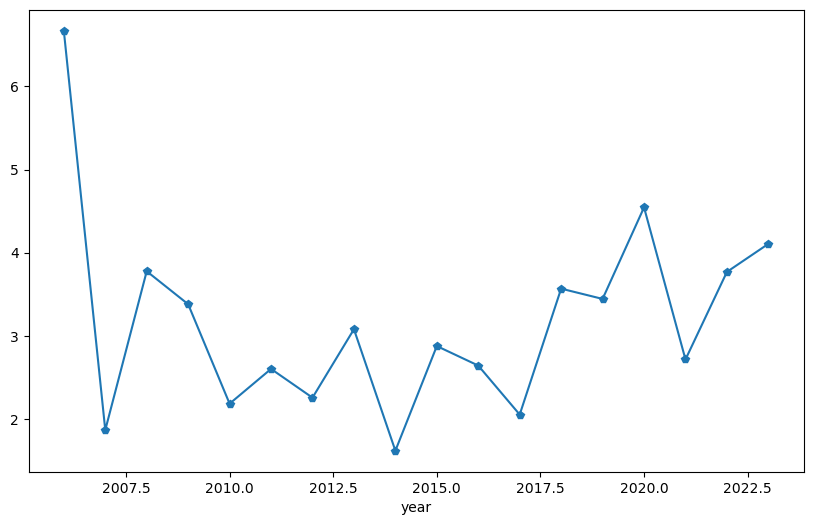

In [11]:
# TODO: BEGIN YOUR EDA! exploratory data analysis explore_weather.ipynb 
"""year	
rain_max	
temp_avg	
temp_max	
temp_min	
hum_max	
hum_min	
wind_max	
wind_avg	
subdivision"""
weather.groupby("year")["rain_max"].mean().plot(kind="line", marker="p", figsize=(10,6))

"""weather.groupby("year")["temp_avg"].mean().plot(kind="line", marker="p", figsize=(10,6))
weather.groupby("year")["temp_max"].mean().plot(kind="line", marker="p", figsize=(10,6))
weather.groupby("year")["temp_min"].mean().plot(kind="line", marker="p", figsize=(10,6))
weather.groupby("year")["hum_max"].mean().plot(kind="line", marker="p", figsize=(10,6))
weather.groupby("year")["hum_min"].mean().plot(kind="line", marker="p", figsize=(10,6))
weather.groupby("year")["wind_max"].mean().plot(kind="line", marker="p", figsize=(10,6))
weather.groupby("year")["wind_avg"].mean().plot(kind="line", marker="p", figsize=(10,6))
weather.groupby("year")["subdivision"].mean().plot(kind="line", marker="p", figsize=(10,6))"""

## 🧠Univariate Analysis 

How is average temperature, minimum humidity, and average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?
Which year had the highest maximum record rainfall?

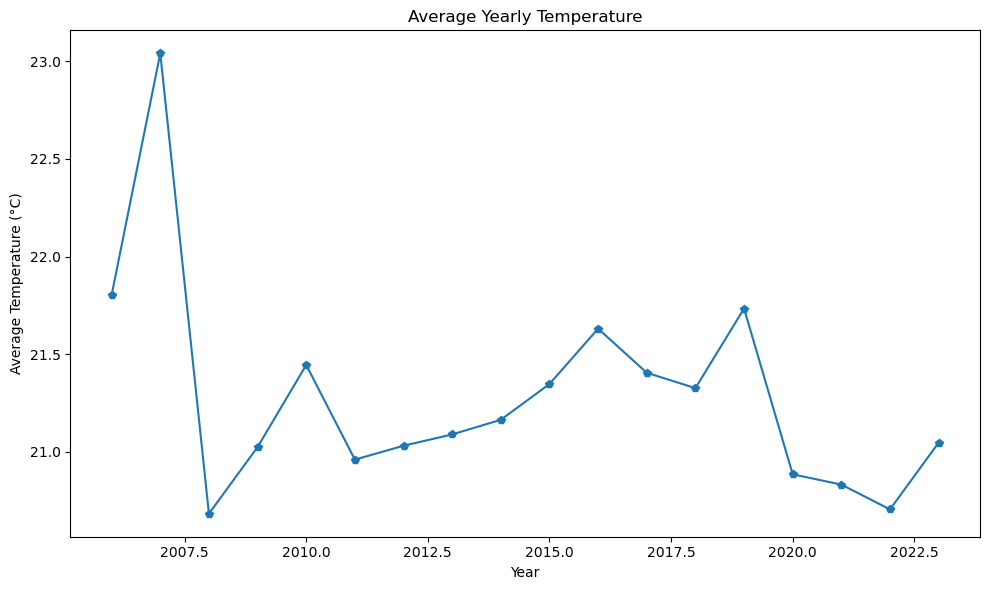

In [12]:
# TODO: average temperature
weather.groupby("year")["temp_avg"].mean().plot(kind="line", marker="p", figsize=(10,6))
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Yearly Temperature")  
plt.tight_layout()

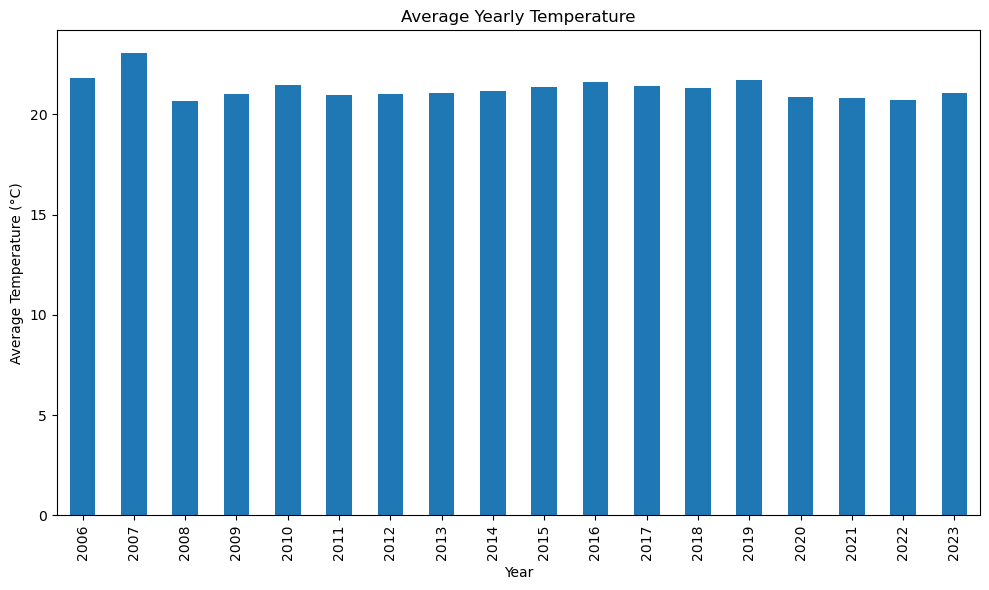

In [13]:
# TODO: average temperature
weather.groupby("year")["temp_avg"].mean().plot(kind="bar", figsize=(10,6))
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Yearly Temperature")  
plt.tight_layout()

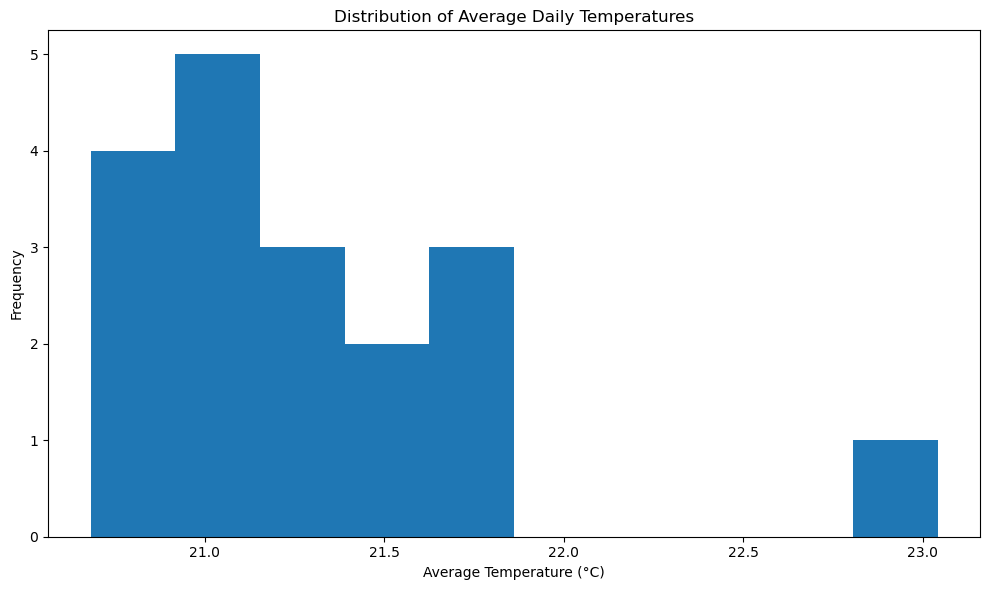

In [14]:
weather["temp_avg"].plot.hist(figsize=(10,6))
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Daily Temperatures")
plt.tight_layout()

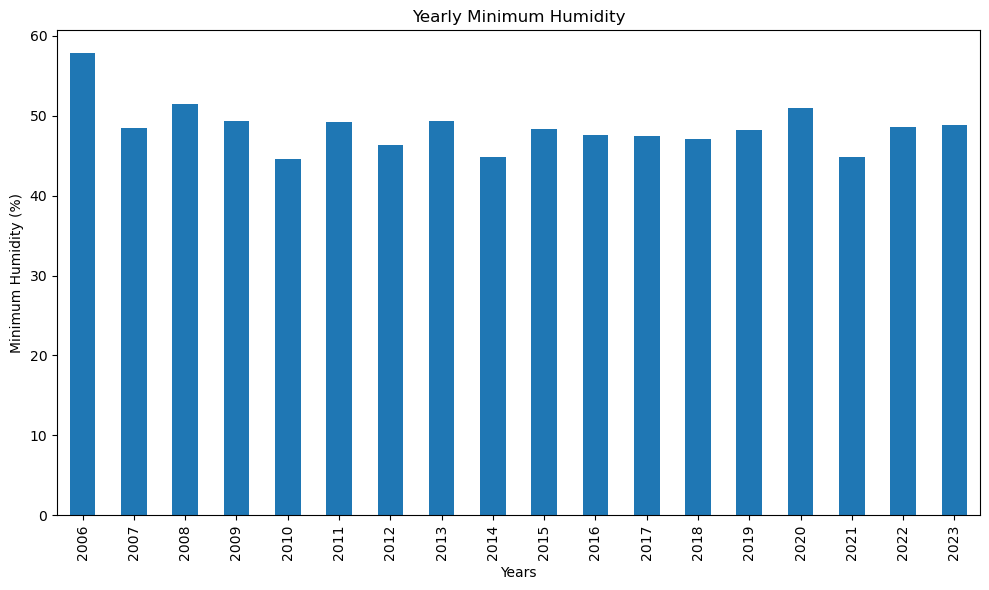

In [15]:
# TODO: minimum humidity
weather.groupby("year")["hum_min"].mean().plot(kind="bar", figsize=(10,6))
plt.xlabel("Years")
plt.ylabel("Minimum Humidity (%)")
plt.title("Yearly Minimum Humidity")  
plt.tight_layout()
plt.show()

## 🌬️ Average wind speed changing across the years.

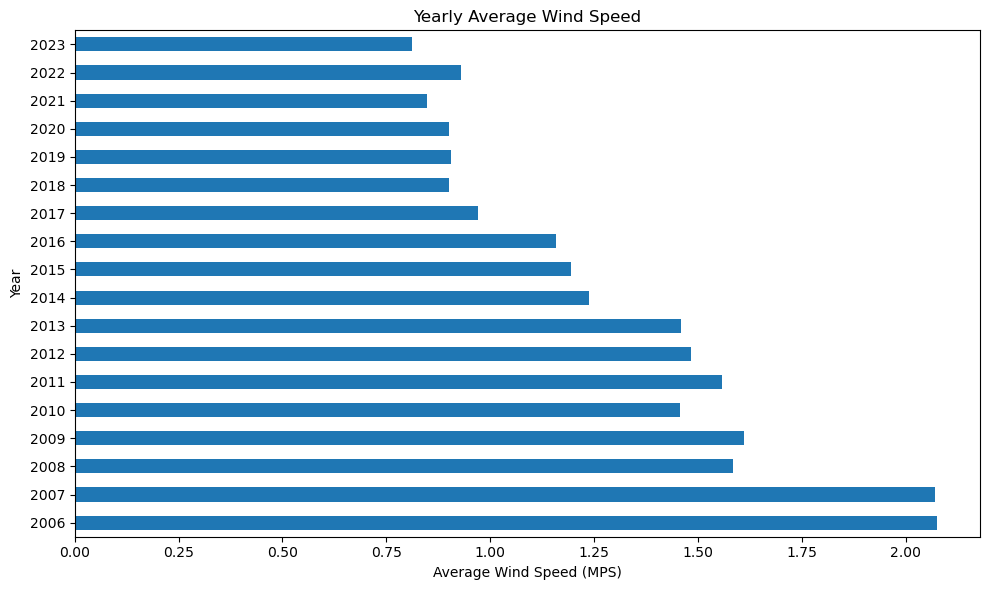

In [16]:
# TODO: average wind speed 
weather.groupby("year")["wind_avg"].mean().plot(kind="barh", figsize=(10,6))
plt.xlabel("Average Wind Speed (MPS)")
plt.ylabel("Year")
plt.title("Yearly Average Wind Speed")  
plt.tight_layout()

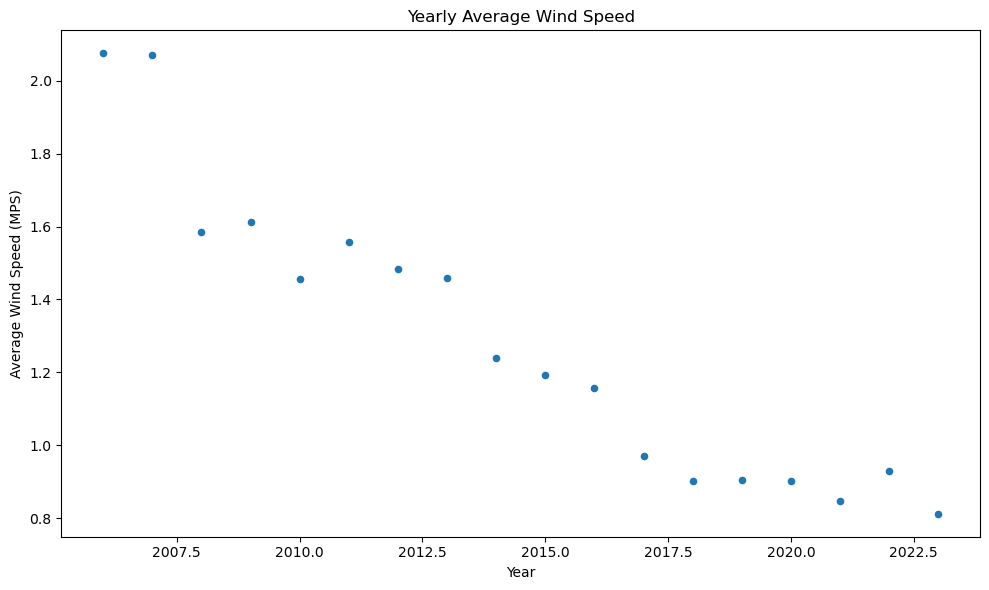

In [17]:
weather.plot.scatter(x="year", y="wind_avg", figsize=(10,6))
plt.xlabel("Year")
plt.ylabel("Average Wind Speed (MPS)")
plt.title("Yearly Average Wind Speed")  
plt.tight_layout()

In [18]:
weather["year"].corr(weather["wind_avg"]) #Pearson's correlation coefficinet is very high negatve 

np.float64(-0.9516285243842627)

## 🌧️ Which year had the highest maximum record rainfall?

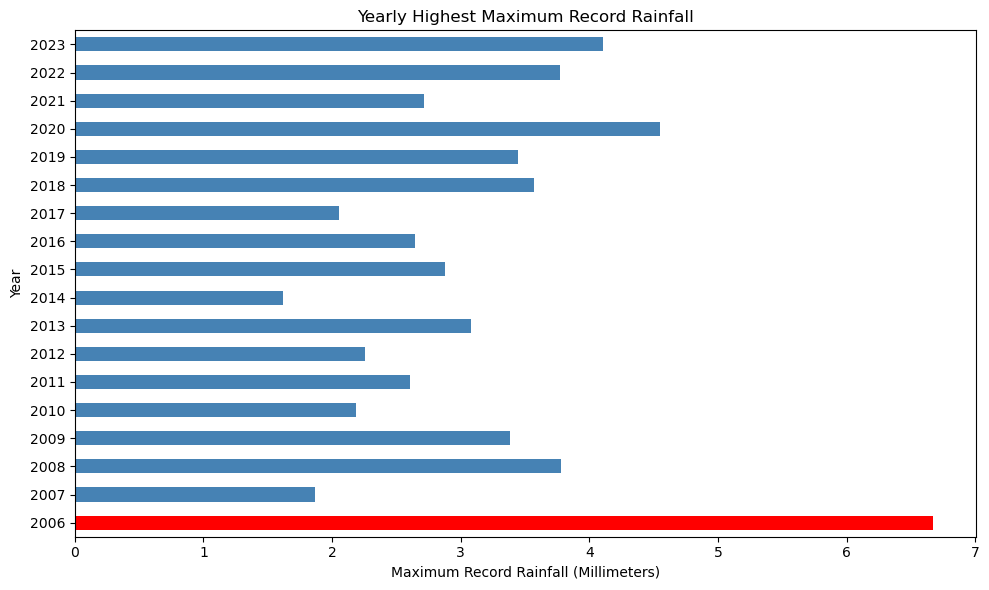

In [19]:
# TODO: year with highest maximum record rainfall
rain = weather.groupby("year")["rain_max"].max()
rain.plot(kind="barh", figsize=(10,6), color=['red' if r == rain.max() else 'steelblue' for r in rain])
plt.xlabel("Maximum Record Rainfall (Millimeters)")
plt.ylabel("Year")
plt.title("Yearly Highest Maximum Record Rainfall")
plt.tight_layout()

In [20]:
weather.groupby("year").rain_max.describe() #data frame confirms 2006 is the year with Maxium amount of rain.

#Should we remove NAN???

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2006,1.0,6.670968,NaN,6.670968,6.670968,6.670968,6.670968,6.670968
2007,1.0,1.866250,NaN,1.866250,1.866250,1.866250,1.866250,1.866250
2008,1.0,3.777049,NaN,3.777049,3.777049,3.777049,3.777049,3.777049
2009,1.0,3.380220,NaN,3.380220,3.380220,3.380220,3.380220,3.380220
2010,1.0,2.183516,NaN,2.183516,2.183516,2.183516,2.183516,2.183516
2011,1.0,2.601786,NaN,2.601786,2.601786,2.601786,2.601786,2.601786
2012,1.0,2.255738,NaN,2.255738,2.255738,2.255738,2.255738,2.255738
2013,1.0,3.079121,NaN,3.079121,3.079121,3.079121,3.079121,3.079121
2014,1.0,1.617582,NaN,1.617582,1.617582,1.617582,1.617582,1.617582


<Axes: xlabel='year', ylabel='rain_max'>

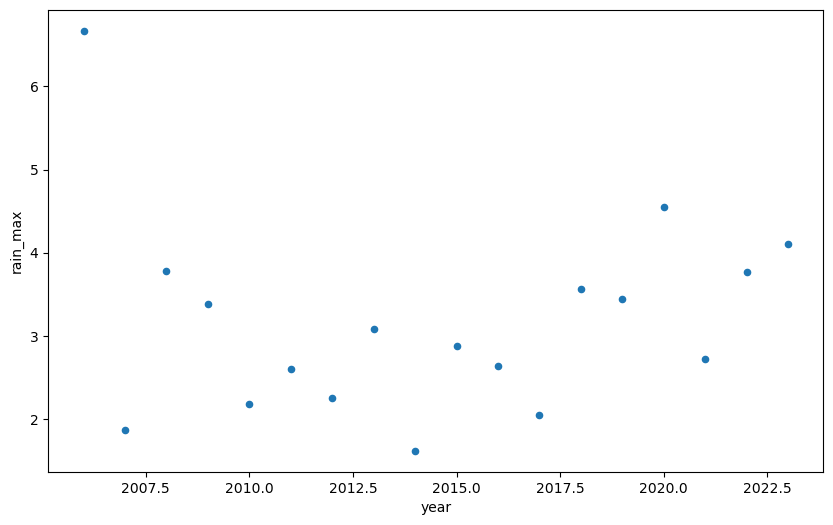

In [21]:
weather.plot.scatter(x="year", y="rain_max", figsize=(10,6))

In [22]:
weather["year"].corr(weather["rain_max"]) #Pearson's correlation coefficinet is very low 

np.float64(0.0046307990823462675)

## 🧠Bivariate Analysis

What is the relationship between max rain and max humidity? How strong is this relationship? Use pearson's correlation coefficient.
What is the relationship between average wind speed and average temperature? How strong is this relationship? Use pearson's correlation coefficient.

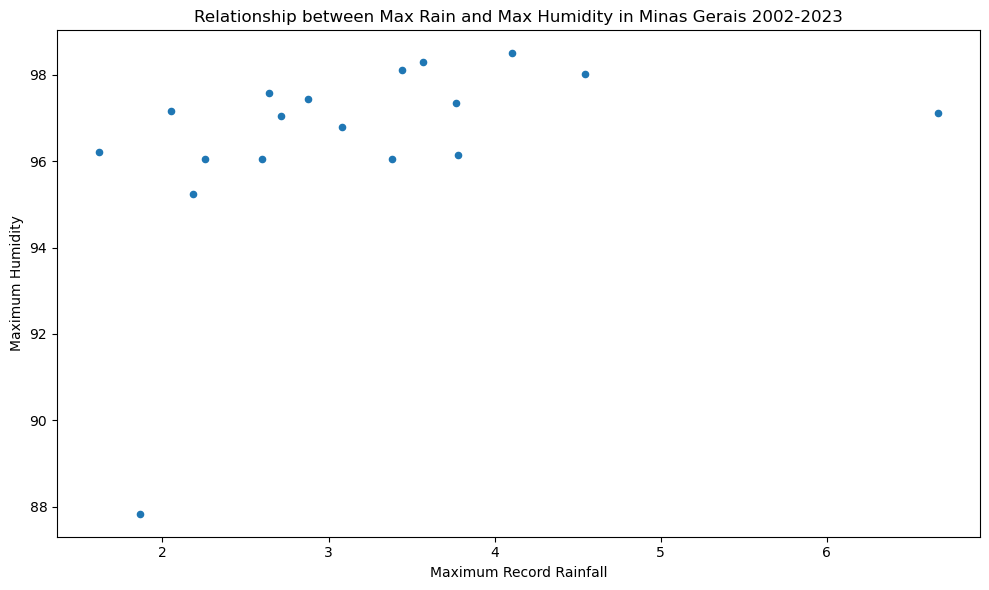

In [23]:
weather.plot.scatter(x="rain_max",y="hum_max", figsize=(10, 6))

plt.xlabel("Maximum Record Rainfall")
plt.ylabel("Maximum Humidity")
plt.title("Relationship between Max Rain and Max Humidity in Minas Gerais 2002-2023")
plt.tight_layout()

In [24]:
# Pearson's correlation coefficient
# Calculate the correlation between max-temperature and min-humidity
wind_temp_max_corr = pearsonr(weather['wind_avg'], weather['temp_max'])
print(f"Pearson's r: {wind_temp_max_corr[0]:.2f} and p-value: {wind_temp_max_corr[1]:.2e}")

Pearson's r: -0.72 and p-value: 7.09e-04


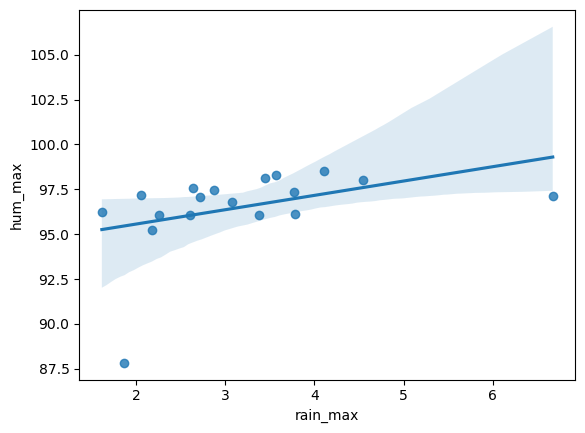

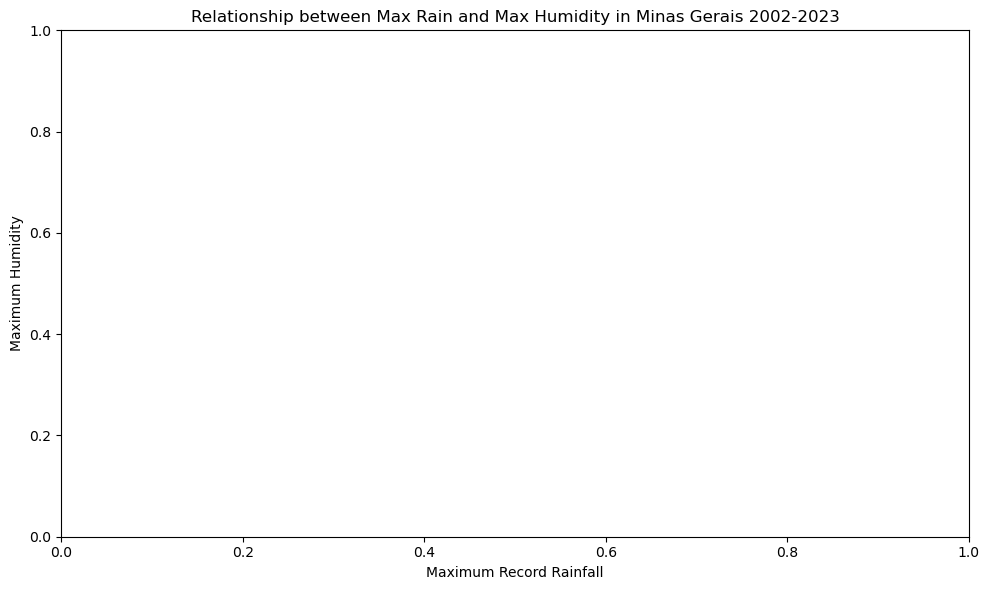

In [25]:
sns.regplot(x=weather["rain_max"], y=weather["hum_max"])
plt.figure(figsize=(10, 6))
plt.xlabel("Maximum Record Rainfall")
plt.ylabel("Maximum Humidity")
plt.title("Relationship between Max Rain and Max Humidity in Minas Gerais 2002-2023")
plt.tight_layout()

In [26]:
weather["rain_max"].corr(weather["hum_max"]) #How strong is this relationship? Use pearson's correlation coefficient. relationship between max rain and max humidity

np.float64(0.40578216801444184)

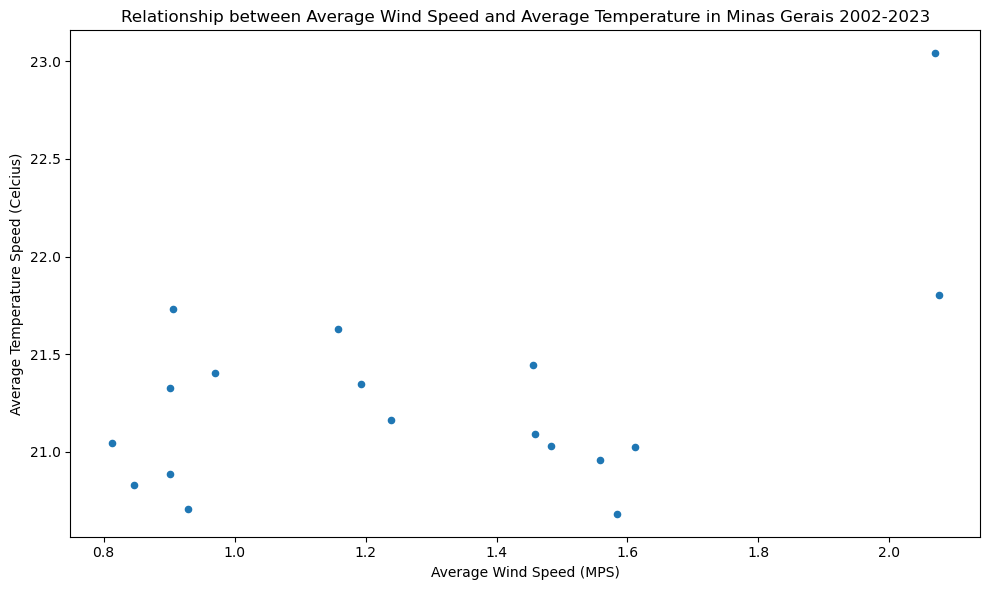

In [27]:
weather.plot.scatter(x="wind_avg",y="temp_avg", figsize=(10, 6))
plt.xlabel("Average Wind Speed (MPS)")
plt.ylabel("Average Temperature Speed (Celcius)")
plt.title("Relationship between Average Wind Speed and Average Temperature in Minas Gerais 2002-2023")
plt.tight_layout()

In [28]:
weather["wind_avg"].corr(weather["temp_avg"]) #relationship between average wind speed and average temperature? How strong is this relationship? Use pearson's correlation coefficient.

np.float64(0.4765294973950928)

<Axes: xlabel='year', ylabel='temp_avg'>

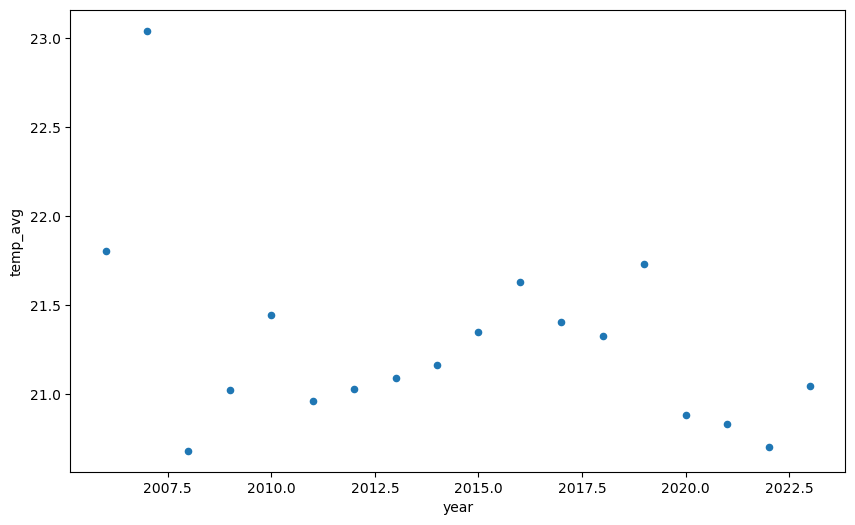

In [29]:
weather.plot.scatter(x="year", y="temp_avg", figsize=(10,6))

#Can/Should we remove floats?


In [30]:
weather.pivot_table(
    values=["temp_avg", "wind_avg", "hum_max","rain_max"],
    index="year",
    aggfunc="mean"
)

,hum_max,rain_max,temp_avg,wind_avg
year,,,,
2006,97.129032,6.670968,21.803087,2.075207
2007,87.837500,1.866250,23.040999,2.069605
2008,96.136612,3.777049,20.682400,1.584408
2009,96.054945,3.380220,21.023802,1.611746
2010,95.247253,2.183516,21.444293,1.455907
2011,96.060440,2.601786,20.959536,1.557709
2012,96.060109,2.255738,21.030624,1.483515
2013,96.802198,3.079121,21.088660,1.459356
2014,96.214286,1.617582,21.163462,1.238874


## 🌧️ max rain and max humidity
How strong is this relationship? Use pearson's correlation coefficient.

<Axes: xlabel='temp_avg', ylabel='wind_avg'>

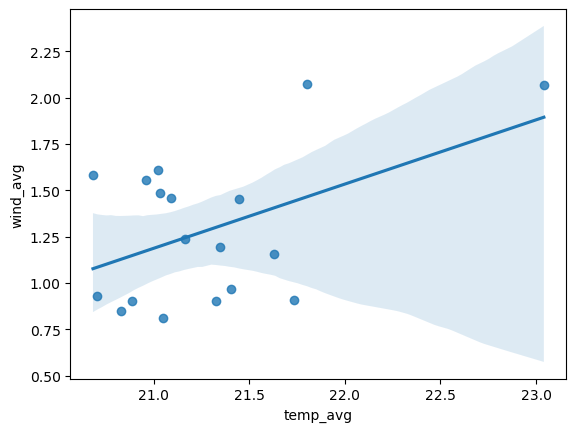

In [31]:
sns.regplot(x=weather["temp_avg"], y=weather["wind_avg"])


In [32]:
weather[["rain_max", "hum_max"]].corr()

,rain_max,hum_max
rain_max,1.000000,0.405782
hum_max,0.405782,1.000000


In [33]:
weather["rain_max"].corr(weather["hum_max"])

np.float64(0.40578216801444184)

## 💨  wind speed and average temperature
What is the relationship between average wind speed and average temperature? How strong is this relationship? Use pearson's correlation coefficient.

In [34]:
weather[["wind_avg", "temp_avg"]].corr()

,wind_avg,temp_avg
wind_avg,1.000000,0.476529
temp_avg,0.476529,1.000000


<Axes: xlabel='wind_avg', ylabel='year'>

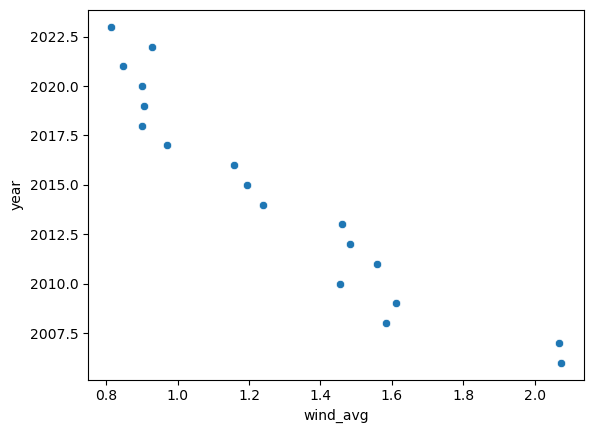

In [35]:
sns.scatterplot(x=weather["wind_avg"], y=weather["year"])

In [36]:
sns.kdeplot(x=weather["house age"], y=weather["year"])

KeyError: 'house age'

In [ ]:
sns.boxplot(data=weather, x="num_of_rooms", y="year")

## 🌬️**Weather Trends in Minas Gerais (2006–2023)**

TODO: BEGIN YOUR EDA! exploratory data analysis explore_weather.ipynb

In [ ]:
# TODO: BEGIN YOUR EDA! exploratory data analysis explore_weather.ipynb 
weather["date"] = pd.todatetime(weather)["date"]. format "]
# Should one create a pivot table for this analysis? 


## 🧠 Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context. 

## How is average temperature changing across the years for Minas Gerais? Is this increasing or decreasing?

As evidenced in our univariate bar chart, the weather in Minas Gerais has been relatively stable acorss the years, with small fluctuations in 2007 and then again between 2018 and 2019. 

However, overall there does not seem to be a strong increase or decrease in temperatures trends. 

## How is minimum humidity changing across the years for Minas Gerais? Is this increasing or decreasing?

Humidity fluctuates noticeably from year to year, however keep in mid that we are only considering the months of January through May, so in order to get a true picture of the humidity changes over years time, we must add more to stats to our data set.

That stated, around 2012, 2015, and 2021, there are lower trends in humidity.

In our data set, humidity values seem somewhat stable. Overall there does not appear to be any strong increasing or decreasing trend across all years.

Minimum humidity is variable but overall stable, without a clear long-term increase or decrease.

## How is average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?

Clear decreasing trend in wind speed over time.

Wind speed was highest in 2006–2007 and has consistently declined through 2023.

Especially sharp drop after 2013–2014.

Average wind speed is clearly decreasing over the years.

## Which year had the highest maximum record rainfall

The year 2006 had the highest maximum rainfall, which stood out significantly. I also expected more year-to-year variability in average temperatures, but it remained fairly consistent.

## What is the relationship between max rain and max humidity? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here

## What is the relationship between average wind speed and average temperature? How *strong* is this relationship? Use pearson's correlation coefficient.

I noticed that average wind speed has been decreasing over time. Average temperature shows some fluctuations but may be slightly increasing overall. Humidity levels also vary but appear to stay within a certain range.


## NOTES

"""Showing the distribution of all the temperature values

Showing the distribution of wind speeds

Showing how humidity is spread, not changing
 Histograms show distribution of values (how values are spread out) —
They do NOT show change over time
	Show distribution of one variable (e.g., what temperatures are common)
"""



Univariate Analysis
How is average temperature, minimum humidity, and average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?
Which year had the highest maximum record rainfall?

Bivariate Analysis
What is the relationship between max rain and max humidity? How strong is this relationship? Use pearson's correlation coefficient.
What is the relationship between average wind speed and average temperature? How strong is this relationship? Use pearson's correlation coefficient.

Numerical Examples
df.describe() returns a dataframe of summary statistics. We can use this to identify outliers or erroneous data
df.value_counts(“num_of_rooms”) categorical data, it’s useful to see how often a certain unique category pops up in our dataframe

Visual Examples
df[“house age”].plot.hist() Plotting actually comes “baked-in” with pandas. The method I use at the end allows us to create specific plots.
df[“distance_to_mrt”].plot.hist() Exploratory analysis is all about self-guided research. However a good idea usually is to plot histplots on all numeric variables. 
df.value_counts(“num_of_rooms”).plot.bar() We can even apply our “plot” methods on top of other pandas methods to express our numeric data as a visualizations.

bar = catergorical data
histogram = numereical data

Numerical Examples 
df[["house age", "distance_to_mrt"]].corr() By selecting two specific numeric columns, we are able to plot pearson’s correlation coefficient between two variables.

Visual Examples
Bivariate Analysis - Boxplots The median, Upper & lower fence, Any outliers - We miss out on some detail when using a box-plot (shape of distribution), but in return we get exact markers indicating a typical range of a values.

sns.boxplot(data=df, x="num_of_rooms", y="price_per_unit_area") - We depart from our “baked-in” visualizations and instead use seaborn, We specify which dataset we want to use. And lastly, the appropriate dimensions. This detail is important!
sns.scatterplot(x=df["num_of_rooms"], y=df["price_per_unit_area"])  - Notice the difference between method calls! Can we observe any apparent correlations?
sns.kdeplot(x=df["house age"], y=df["distance_to_mrt"]) - Let’s use an alternative plot to see if we can find clusters of data instead…


https://docs.google.com/presentation/d/1lBwQeW6Jklf0DuEoIwr9qK1ytYRTMEOH/edit#slide=id.g34db7b184e9_0_91

"""
At the minimum your README should contain:
One-sentence project summary 
Your methodology 
Your conclusions with specific metrics
Helpful/interesting visuals 
Your challenges & next-steps

For the upcoming and final TLAB, you will write README’s so that a recruiter understands the intent, analysis, and competencies associated with our projects.
However, in the future you should fit your README to your target audience:
Engineers → Inform on software structure
Stakeholders → Inform on value
Regulators → Inform on compliance 

For the upcoming and final TLAB, you will write README’s so that a recruiter understands the intent, analysis, and competencies associated with our projects.
However, in the future you should fit your README to your target audience:
Engineers → Inform on software structure
Stakeholders → Inform on value
Regulators → Inform on compliance 


PANDAS METHODS EXAMPLES

"""
pd.concat([df1,df2,df3]) - takes a list or dict of homogeneously-typed objects and concatenates them with some configurable handling of ‘what to do with the other axes

pd.concat([df1, s2.to_frame().T],ignore_index=True) - If you have a series that you want to append as a single row to a DataFrame, you can convert the row into a DataFrame and use concat.

pd.merge(left, right, on="key") high performance in-memory join operations idiomatically very similar to relational databases like SQL.

df.isna().sum()"

pd.merge()

df.method()

df.isna() - True (Null) or False (not a Null)

df.isna().sum()

df.drop() requires specific column or row index .... ex). df.drop(columns=["year", "rain_max"])

df.dropna() - drops all Null values by row

df.groupby(“col1”)[“col2”].mean() Grouping/Binning - Code

df.groupby(by="num_of_rooms") This method gives us a “groupby” object that keeps track of various groups, gives an error

df.groupby(by="num_of_rooms")[“price_per_unit_area”].mean() Instead, we apply a pattern called “split, apply, combine”

pd.pivot_table(df, values=”...”, index=”...”, columns=”...”, aggfunc=”..”)

isin() 

.str.contains()

df.groupby(“col1”)[“col2”].mean() Split Apply Combine - groupby() method along with an aggregate to calculate summary statistics across groups. We simply “split” by a certain column, “apply” some summary statistics method, and then “combine” it back into a dataframe.

def concatenateTables(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    return pd.concat([df1,df2])

class Solution {
public:
    vector<int> sortArray(vector<int>& nums) {
        
    }
};

"""
Data Reporting - https://docs.google.com/presentation/d/1wAWSr5mg-ChIiw06oLITqrcRBxEs3g1R4SAslOVoxsQ/edit#slide=id.p

https://docs.google.com/document/d/19MOhAkEbVDZNW24AuBpK4ID6jJ1TPjtj5q0mH1nE27M/edit?tab=t.0#heading=h.3tp479ea2eqq

https://docs.google.com/document/d/1Bu89kSOrwDUbCT5aiEEOVlxSlY8RPUhJaRFspOKggFY/edit?tab=t.0#heading=h.4wqlxz5iquwu

https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

https://pandas.pydata.org/docs/user_guide/10min.html#missing-data